In [1]:
import pandas as pd
import glob, os, re, string

In [2]:
os.chdir("D://Scriptie//Data//csv-metadata")

In [3]:
def Titles2Df(title, df, fuzzy_or_strict, npp_title):
    opd = dict()

    for year in list(set(df.year)):
        ss = df[df.year == year]

        tly = len(df)
        
        if fuzzy_or_strict == "fuzzy":
            ltb = len([t for t in list(ss.title) if title in str(t)]) 
        
        if fuzzy_or_strict == "strict":
            ltb = len([t for t in list(ss.title) if str(t) == title]) 

        tmp = ltb / tly * 100
        opd.update({year:tmp})
        
    opd = pd.DataFrame([list(opd.keys()), list(opd.values())]).T
    opd.columns = ['year', 'p']
    opd.year = opd['year'].astype(int)
    opd['npp'] = npp_title
    
    return opd

In [4]:
dfo = pd.DataFrame()

for npp in ['arnc', 'mico', 'brdc', 'algh', 'leco', 'nvdd', 'prda']:
    fn = npp + "_titles.csv"
    df = pd.read_csv(fn)

    tmp = Titles2Df('buitenland', df, 'fuzzy', npp)
    dfo = dfo.append(tmp)

In [5]:
dfo['p'] = dfo['p'].astype(float)
dfo = dfo.pivot(index='year', columns='npp', values='p')
dfo['year'] = list(dfo.index)
dfo = dfo.fillna(0)

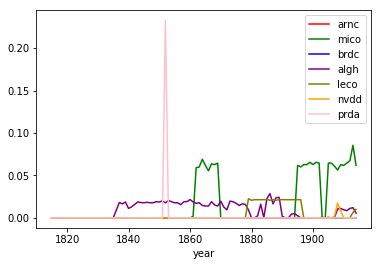

In [152]:
import matplotlib.pyplot as plt

colorz = ['red', 'green', 'blue', 'purple', 'olive', 'orange', 'pink']

ax = plt.gca()

for c,npp in enumerate(['arnc', 'mico', 'brdc', 'algh', 'leco', 'nvdd', 'prda']):
    dfo.plot(kind='line',x='year',y=npp,ax=ax, color=colorz[c])
    

plt.show()


In [6]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
dfo.to_csv('buitenland_titles.csv')

In [55]:
## Check variation within foreign titles
df['title'] = df['title'].astype(str)

dfb = df[df['title'].str.contains("buitenland")]
dfb = dfb.reset_index(drop=True)

for c,i in enumerate(dfb.title):
    if c > 0:
        if i != dfb.title[c-1]:
            print(str(dfb.year[c]) + " | " + i + " | " + dfb.title[c-1])

1819 | leeuwarden den 8 augustus buitenlandsche scheepvaart | buitenlandsche scheepvaart
1820 | buitenlandsche scheepvaart | leeuwarden den 8 augustus buitenlandsche scheepvaart
1825 | buitenlandsche scheepvaart te harlingen | buitenlandsche scheepvaart
1832 | buitenlandsche scheepvaart te harllingen | buitenlandsche scheepvaart te harlingen
1833 | buitenlandsche scheepvaart te harlingen | buitenlandsche scheepvaart te harllingen
1834 | mengelwerk iris bloemlezing uit buitenlandsche tijdschriften | buitenlandsche scheepvaart te harlingen
1834 | buitenlandsche scheepvaart te harlingen | mengelwerk iris bloemlezing uit buitenlandsche tijdschriften
1835 | buitenlandsche scheepvaart te harlingen van den 25 october tot den 1 november 1835 | buitenlandsche scheepvaart te harlingen
1835 | buitenlandsche scheepvaart te harlingen van den 18 tot den 25 october 1835 | buitenlandsche scheepvaart te harlingen van den 25 october tot den 1 november 1835
1835 | buitenlandsche scheepvaart te harlingen 

1904 | buitenlandsche berichten | buitenlandsch overzicht 9 februari
1904 | buitenlandsch overzicht 29 augustus | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlandsch overzicht 29 augustus
1904 | buitenlandsch overzicht 29 augustus | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlandsch overzicht 29 augustus
1904 | buitenlandsch overzicht 25 januari | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlandsch overzicht 25 januari
1904 | buitenlandsch overzicht 25 januari | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlandsch overzicht 25 januari
1904 | buitenlandsch overzicht 18 mei | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlandsch overzicht 18 mei
1904 | buitenlandsch overzicht 18 mei | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlandsch overzicht 18 mei
1904 | buitenlandsch overzicht 9 september | buitenlandsche berichten
1904 | buitenlandsche berichten | buitenlands

1911 | buitenlandsch overzicht 6 juli | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 6 juli
1911 | buitenlandsch overzicht 5 april | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 5 april
1911 | buitenlandsch overzicht 5 april | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 5 april
1911 | buitenlandsch overzicht 6 september | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 6 september
1911 | buitenlandsch overzicht 6 september | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 6 september
1911 | buitenlandsch overzicht 26 mei | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 26 mei
1911 | buitenlandsch overzicht 26 mei | buitenlandsche berichten
1911 | buitenlandsche berichten | buitenlandsch overzicht 26 mei
1911 | buitenlandsch overzicht 22 december | buitenlandsche berich

In [31]:
df.title[c-1]

'middelburgsche courant'